In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv("C:/Users/HP/Downloads/ecom-user-churn-data.csv/ecom-user-churn-data.csv")
data.head()

,visitorid,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,...,int_cat16_n,int_cat17_n,int_cat18_n,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class
0,89,23.0,16.0,0.0,0.0,39.0,2.0,0.051282,3.0,1.500000,...,0,0,0,0,3,0,0,0,0,1
1,251,23.0,61.0,0.0,0.0,85.0,2.0,0.023529,2.0,1.000000,...,0,0,0,0,0,0,1,0,0,1
2,270,14.0,0.1,0.3,3.0,21.0,11.0,0.523810,13.0,1.181818,...,0,0,0,0,0,0,13,0,0,1
3,298,11.0,13.0,0.0,0.0,24.0,2.0,0.083333,4.0,2.000000,...,0,0,0,3,1,0,0,0,0,1
4,474,16.0,26.0,0.0,0.0,43.0,2.0,0.046512,2.0,1.000000,...,2,0,0,0,0,0,0,0,0,1


In [9]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data_scaled = scale.fit_transform(data)

# Logistic regression

In [48]:
x= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

In [49]:
print(y)

[1 1 1 ... 1 1 1]


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [52]:
from sklearn.linear_model import LogisticRegression
classifier1= LogisticRegression(random_state=0)
classifier1.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [53]:
y_pred1= classifier1.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
print(np.concatenate((y_pred1.reshape(len(y_pred1),1),y_test.reshape(len(y_test),1)),axis=1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred1)


array([[ 114, 1060],
       [  48, 8650]], dtype=int64)

In [55]:
accuracy_score(y_test,y_pred1)

0.8877633711507293

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.10      0.17      1174
           1       0.89      0.99      0.94      8698

    accuracy                           0.89      9872
   macro avg       0.80      0.55      0.56      9872
weighted avg       0.87      0.89      0.85      9872



# Decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier2= DecisionTreeClassifier(criterion='gini', max_depth= 3, max_features= 7, min_samples_leaf= 8,random_state=4)
classifier2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=7, min_samples_leaf=8,
                       random_state=4)

In [59]:
y_pred2= classifier2.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
print(np.concatenate((y_pred2.reshape(len(y_pred2),1),y_test.reshape(len(y_test),1)),axis=1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred2)


array([[  83, 1091],
       [  35, 8663]], dtype=int64)

In [61]:
accuracy_score(y_test,y_pred2)

0.8859400324149108

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.07      0.13      1174
           1       0.89      1.00      0.94      8698

    accuracy                           0.89      9872
   macro avg       0.80      0.53      0.53      9872
weighted avg       0.87      0.89      0.84      9872



# K-NN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier3= KNeighborsClassifier()
classifier3.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred3= classifier3.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
print(np.concatenate((y_pred3.reshape(len(y_pred3),1),y_test.reshape(len(y_test),1)),axis=1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred3)

array([[ 115, 1059],
       [ 177, 8521]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred3)

0.8747974068071313

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.39      0.10      0.16      1174
           1       0.89      0.98      0.93      8698

    accuracy                           0.87      9872
   macro avg       0.64      0.54      0.54      9872
weighted avg       0.83      0.87      0.84      9872



# Naive bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
classifier4= GaussianNB()
classifier4.fit(x_train,y_train)

GaussianNB()

In [28]:
y_pred4= classifier4.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
print(np.concatenate((y_pred4.reshape(len(y_pred4),1),y_test.reshape(len(y_test),1)),axis=1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred4)

array([[ 133, 1041],
       [ 256, 8442]], dtype=int64)

In [30]:
accuracy_score(y_test,y_pred4)

0.8686183144246353

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.34      0.11      0.17      1174
           1       0.89      0.97      0.93      8698

    accuracy                           0.87      9872
   macro avg       0.62      0.54      0.55      9872
weighted avg       0.83      0.87      0.84      9872



# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier5= RandomForestClassifier(criterion="entropy",random_state=0)
classifier5.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [9]:
y_pred5= classifier5.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
print(np.concatenate((y_pred5.reshape(len(y_pred5),1),y_test.reshape(len(y_test),1)),axis=1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred5)

array([[ 123, 1051],
       [  51, 8647]], dtype=int64)

In [11]:
accuracy_score(y_test,y_pred5)

0.8883711507293355

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.71      0.10      0.18      1174
           1       0.89      0.99      0.94      8698

    accuracy                           0.89      9872
   macro avg       0.80      0.55      0.56      9872
weighted avg       0.87      0.89      0.85      9872



# SVM

In [37]:
from sklearn.svm import SVC
classifier6= SVC(kernel="rbf",random_state=0)
classifier6.fit(x_train,y_train)

SVC(random_state=0)

In [38]:
y_pred6= classifier6.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
print(np.concatenate((y_pred6.reshape(len(y_pred6),1),y_test.reshape(len(y_test),1)),axis=1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred6)

array([[  28, 1146],
       [   7, 8691]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred6)

0.8832050243111832

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.80      0.02      0.05      1174
           1       0.88      1.00      0.94      8698

    accuracy                           0.88      9872
   macro avg       0.84      0.51      0.49      9872
weighted avg       0.87      0.88      0.83      9872



# XGboost

In [43]:
from xgboost import XGBClassifier
classifier7 = XGBClassifier()
classifier7.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:14:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred7 = classifier7.predict(x_test)
cm = confusion_matrix(y_test, y_pred7)
print(cm)
accuracy_score(y_test, y_pred7)

[[ 155 1019]
 [ 117 8581]]


0.8849270664505673

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.57      0.13      0.21      1174
           1       0.89      0.99      0.94      8698

    accuracy                           0.88      9872
   macro avg       0.73      0.56      0.58      9872
weighted avg       0.86      0.88      0.85      9872



# ENSEMBLE LEARNING

# Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
classifier8= GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
classifier8.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [10]:
y_pred_gb= classifier8.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
print(np.concatenate((y_pred_gb.reshape(len(y_pred_gb),1),y_test.reshape(len(y_test),1)),axis=1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_gb))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gb))

accuracy_score(y_test,y_pred_gb)

[[ 126 1048]
 [  53 8645]]
              precision    recall  f1-score   support

           0       0.70      0.11      0.19      1174
           1       0.89      0.99      0.94      8698

    accuracy                           0.89      9872
   macro avg       0.80      0.55      0.56      9872
weighted avg       0.87      0.89      0.85      9872



0.8884724473257699

# Adaboost

In [12]:
from sklearn.ensemble import AdaBoostClassifier
classifier9= AdaBoostClassifier(n_estimators=100,random_state=0)
classifier9.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [13]:
y_pred_ab= classifier9.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
print(np.concatenate((y_pred_ab.reshape(len(y_pred_ab),1),y_test.reshape(len(y_test),1)),axis=1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_ab))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ab))

accuracy_score(y_test,y_pred_ab)

[[ 130 1044]
 [  60 8638]]
              precision    recall  f1-score   support

           0       0.68      0.11      0.19      1174
           1       0.89      0.99      0.94      8698

    accuracy                           0.89      9872
   macro avg       0.79      0.55      0.57      9872
weighted avg       0.87      0.89      0.85      9872



0.8881685575364667

# Bagging

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
classifier10= BaggingClassifier(base_estimator=SVC(),n_estimators=10,random_state=0)
classifier10.fit(x_train,y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [16]:
y_pred_boost= classifier10.predict(x_test)
np.set_printoptions(precision=2)#TWO DIGIT AFTER DECIMAL
print(np.concatenate((y_pred_boost.reshape(len(y_pred_boost),1),y_test.reshape(len(y_test),1)),axis=1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_boost))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_boost))

accuracy_score(y_test,y_pred_boost)

[[  38 1136]
 [  11 8687]]
              precision    recall  f1-score   support

           0       0.78      0.03      0.06      1174
           1       0.88      1.00      0.94      8698

    accuracy                           0.88      9872
   macro avg       0.83      0.52      0.50      9872
weighted avg       0.87      0.88      0.83      9872



0.8838128038897893

In [1]:
Accuracy = (0.8877633711507293,0.886441952894117,0.8747974068071313,0.8686183144246353,0.8883711507293355,0.8832050243111832,
           0.8849270664505673,0.8884724473257699,0.8881685575364667,0.8838128038897893)
Accuracy

(0.8877633711507293,
 0.886441952894117,
 0.8747974068071313,
 0.8686183144246353,
 0.8883711507293355,
 0.8832050243111832,
 0.8849270664505673,
 0.8884724473257699,
 0.8881685575364667,
 0.8838128038897893)

In [2]:
Classifier = ["LR","DT","KNN","NB","RF","SVM","XGB","GB","AB","Bag"]

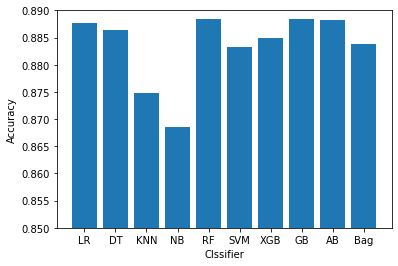

In [45]:
plt.bar(Classifier,Accuracy)
plt.ylim([0.85,0.89])
plt.xlabel("Clssifier")
plt.ylabel("Accuracy")
plt.savefig('test_3.jpg')

In [38]:
F1_score = (0.94,0.94,0.93,0.93,0.94,0.94,0.94,0.94,0.94,0.94)   

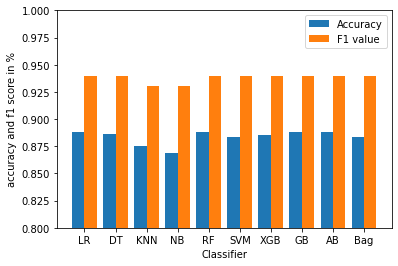

In [40]:
w=0.4
bar1=np.arange(len(Classifier))
plt.ylim([0.0,1])

bar2=[i+w for i in bar1]
plt.bar(bar1,Accuracy,0.4,label="Accuracy")
plt.bar(bar2,F1_score,0.4,label="F1 value")
plt.xlabel("Classifier")
plt.ylabel("accuracy and f1 score in %")
plt.xticks(bar1+w/2,Classifier)
plt.legend()
plt.savefig('test_4.jpg')